In [1]:
import os
file_name = os.path.join("jena_climate_2009_2016.csv")
file_name

'jena_climate_2009_2016.csv'

In [2]:
with open(file_name) as f:
    data = f.read()
data[0]

'"'

In [3]:
lines = data.split("\n")
lines[0]

'"Date Time","p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)","VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)"'

In [4]:
header = lines[0].split(",")
lines = lines[1:]
header

['"Date Time"',
 '"p (mbar)"',
 '"T (degC)"',
 '"Tpot (K)"',
 '"Tdew (degC)"',
 '"rh (%)"',
 '"VPmax (mbar)"',
 '"VPact (mbar)"',
 '"VPdef (mbar)"',
 '"sh (g/kg)"',
 '"H2OC (mmol/mol)"',
 '"rho (g/m**3)"',
 '"wv (m/s)"',
 '"max. wv (m/s)"',
 '"wd (deg)"']

In [5]:
len(lines), len(header)

(420451, 15)

In [6]:
import numpy as np
temperature = np.zeros(len(lines))
temperature[:10], len(temperature)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 420451)

In [7]:
raw_data = np.zeros((len(lines), len(header) - 1))
raw_data.shape

(420451, 14)

In [8]:
raw_data[:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]  # to skip the time column
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

In [10]:
len(temperature)

420451

In [11]:
raw_data.shape

(420451, 14)

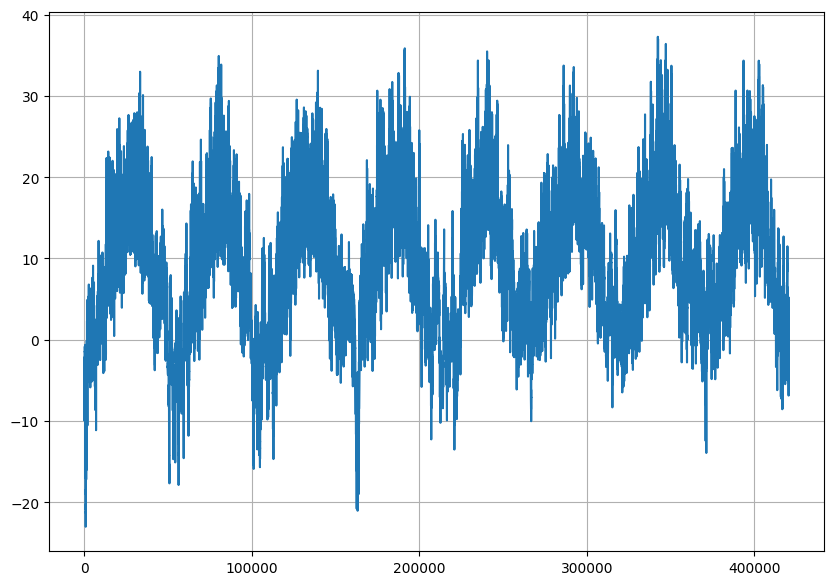

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(range(len(temperature)), temperature)
plt.show()

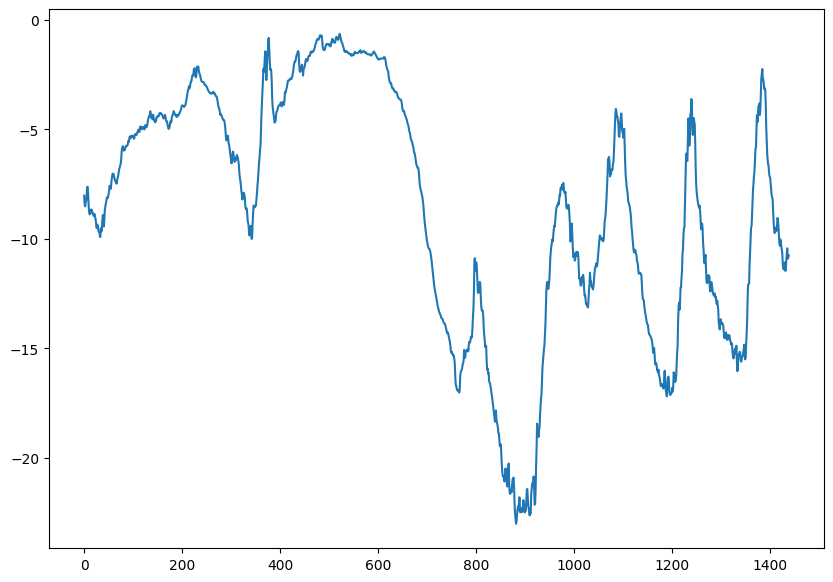

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(range(1440), temperature[:1440])  # for 10 days
plt.show()

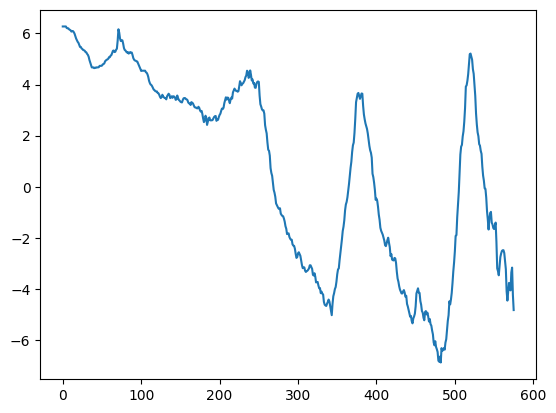

In [14]:
plt.plot(range(576), temperature[-576:])  # for the last 4 days
plt.show()

In [15]:
raw_data[:5, :]

array([[ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
         9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
         1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
         1.75000e+00,  1.52300e+02],
       [ 9.96570e+02, -8.41000e+00,  2.65010e+02, -9.28000e+00,
         9.34000e+01,  3.23000e+00,  3.02000e+00,  2.10000e-01,
         1.89000e+00,  3.03000e+00,  1.30980e+03,  7.20000e-01,
         1.50000e+00,  1.36100e+02],
       [ 9.96530e+02, -8.51000e+00,  2.64910e+02, -9.31000e+00,
         9.39000e+01,  3.21000e+00,  3.01000e+00,  2.00000e-01,
         1.88000e+00,  3.02000e+00,  1.31024e+03,  1.90000e-01,
         6.30000e-01,  1.71600e+02],
       [ 9.96510e+02, -8.31000e+00,  2.65120e+02, -9.07000e+00,
         9.42000e+01,  3.26000e+00,  3.07000e+00,  1.90000e-01,
         1.92000e+00,  3.08000e+00,  1.30919e+03,  3.40000e-01,
         5.00000e-01,  1.98000e+02],
       [ 9.96510e+02, -8.27000e+00,  2.65150e+02, -9.04000e+00,
         9.41000e+01

In [16]:
train_split = int(0.5 * len(raw_data))
validation_split = int(0.75 * len(raw_data))
train_samples = raw_data[:train_split]
validation_samples = raw_data[train_split:validation_split]
test_samples = raw_data[validation_split:]
len(train_samples), len(validation_samples), len(test_samples)

(210225, 105113, 105113)

In [17]:
mean = train_samples.mean(axis=0)
raw_data[0, :]

array([ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
        9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
        1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
        1.75000e+00,  1.52300e+02])

In [18]:
raw_data -= mean  # to scale the value
raw_data[0,:]

array([  7.77070534, -16.84590329, -17.5050718 , -13.21331863,
        17.42724524,  -9.81569946,  -6.08414209,  -3.73148184,
        -3.87050741,  -6.18208943,  89.29795985,  -1.11977462,
        -1.81048029, -24.1405232 ])

In [19]:
mean

array([ 988.74929466,    8.82590329,  282.9050718 ,    4.31331863,
         75.87275476,   13.14569946,    9.19414209,    3.95148184,
          5.81050741,    9.30208943, 1218.45204015,    2.14977462,
          3.56048029,  176.4405232 ])

In [20]:
std = raw_data.std(axis=0)
std

array([ 8.35944437,  8.42367506,  8.5048102 ,  6.73040306, 16.47710594,
        7.73947215,  4.18389036,  4.89726435,  2.65597021,  4.23512542,
       39.97701754,  1.54182803,  2.34047899, 86.67586212])

In [21]:
raw_data /= std  # To scale the data
raw_data[0, :]

array([ 0.92957199, -1.99982824, -2.05825543, -1.96322843,  1.05766421,
       -1.26826472, -1.45418296, -0.7619523 , -1.4572857 , -1.45971815,
        2.23373241, -0.72626428, -0.77355119, -0.27851495])

In [22]:
raw_data.max(), raw_data.min()

(8.588165786655216, -8.989747559970093)

In [24]:
num_train_samples = int(0.5 * len(raw_data))
num_validation_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_validation_samples

import tensorflow as tf
sampling_rate = 6
sequence_length = 120
dalay =sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-dalay],
    targets=raw_data[dalay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples
)

validation_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-dalay],
    targets=raw_data[dalay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_validation_samples
)

test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-dalay],
    targets=raw_data[dalay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_validation_samples
)


In [25]:
for sample, target in train_dataset:
    print(sample.shape)
    print(target.shape)
    break



(256, 120, 14)
(256, 14)


In [26]:
0.5 * len(raw_data)

210225.5

In [27]:
for sample, target in validation_dataset:
    print(sample.shape)
    print(target.shape)
    break

(256, 120, 14)
(256, 14)


In [28]:
for sample, target in test_dataset:
    print(sample)
    print(target.shape)
    break

tf.Tensor(
[[[ 0.54796768 -0.33309729 -0.3745024  ...  0.62926952  0.38005883
    0.3410347 ]
  [ 0.56112645 -0.33191016 -0.3745024  ... -0.70032105 -0.70091648
    0.35718683]
  [ 0.61854653 -0.29036059 -0.33922824 ... -0.47980359 -0.20529144
    1.0990312 ]
  ...
  [ 1.15207482 -0.23337834 -0.32394277 ...  0.17526298 -0.07711255
    0.27411872]
  [ 1.13652354 -0.17995748 -0.26985573 ... -0.90786689 -0.6752807
    0.57985552]
  [ 1.09106598 -0.17639608 -0.2628009  ... -0.79112236 -0.83764063
   -0.10661011]]

 [[ 1.2417937   0.06933989 -0.03116728 ... -0.33063001 -0.61546389
   -1.85254025]
  [ 1.18198111  0.05628146 -0.03939792 ... -0.12956998 -0.32492507
   -1.88853643]
  [ 1.14609356  0.00404772 -0.08878173 ... -0.03876867 -0.25656299
   -1.61245034]
  ...
  [ 1.71670564 -0.13840791 -0.27455896 ... -0.24631451 -0.57273759
   -1.69563382]
  [ 1.7179019  -0.12653661 -0.2628009  ... -1.18675662 -1.11108893
   -1.85334786]
  [ 1.75977071 -0.22744269 -0.36627176 ... -1.03109724 -1.08545

# Model 1 : Baseline dense model

In [29]:
from keras import layers
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)
model_1 = tf.keras.models.Model(inputs , outputs, name='Model_1_dense')

model_1.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)
callbacks = [tf.keras.callbacks.ModelCheckpoint("Weather time series/model_1_dense", save_best_only=True)]
history_model_1 = model_1.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
809/819 [============================>.] - ETA: 0s - loss: 0.8879 - mae: 0.7121

INFO:tensorflow:Assets written to: Weather time series\model_1_dense\assets


INFO:tensorflow:Assets written to: Weather time series\model_1_dense\assets


819/819 [==============================] - 5s 6ms/step - loss: 0.8875 - mae: 0.7119 - val_loss: 0.8174 - val_mae: 0.6885
Epoch 2/10
817/819 [============================>.] - ETA: 0s - loss: 0.8485 - mae: 0.6946

INFO:tensorflow:Assets written to: Weather time series\model_1_dense\assets


INFO:tensorflow:Assets written to: Weather time series\model_1_dense\assets


819/819 [==============================] - 4s 5ms/step - loss: 0.8485 - mae: 0.6946 - val_loss: 0.8099 - val_mae: 0.6876
Epoch 3/10
819/819 [==============================] - 4s 5ms/step - loss: 0.8425 - mae: 0.6915 - val_loss: 0.8122 - val_mae: 0.6823
Epoch 4/10
819/819 [==============================] - 4s 5ms/step - loss: 0.8400 - mae: 0.6901 - val_loss: 0.8102 - val_mae: 0.6922
Epoch 5/10
819/819 [==============================] - 4s 5ms/step - loss: 0.8372 - mae: 0.6887 - val_loss: 0.8133 - val_mae: 0.6808
Epoch 6/10
819/819 [==============================] - 4s 5ms/step - loss: 0.8356 - mae: 0.6878 - val_loss: 0.8162 - val_mae: 0.6813
Epoch 7/10
819/819 [==============================] - 4s 5ms/step - loss: 0.8347 - mae: 0.6874 - val_loss: 0.8114 - val_mae: 0.6835
Epoch 8/10
819/819 [==============================] - 4s 5ms/step - loss: 0.8334 - mae: 0.6867 - val_loss: 0.8108 - val_mae: 0.6850
Epoch 9/10
819/819 [==============================] - 4s 5ms/step - loss: 0.8322 - mae:

In [30]:
model_1.evaluate(test_dataset)

405/405 [==============================] - 1s 3ms/step - loss: 0.8568 - mae: 0.7004


[0.8568483591079712, 0.7003899216651917]

In [31]:
model_1 = tf.keras.models.load_model("Weather time series/model_1_dense")
model_1.evaluate(test_dataset)

405/405 [==============================] - 2s 3ms/step - loss: 0.8573 - mae: 0.6966


[0.8572836518287659, 0.6966270208358765]

In [32]:
model_1_mae = model_1.evaluate(test_dataset)[1]
model_1_mae

405/405 [==============================] - 1s 3ms/step - loss: 0.8573 - mae: 0.6966


0.6966271996498108

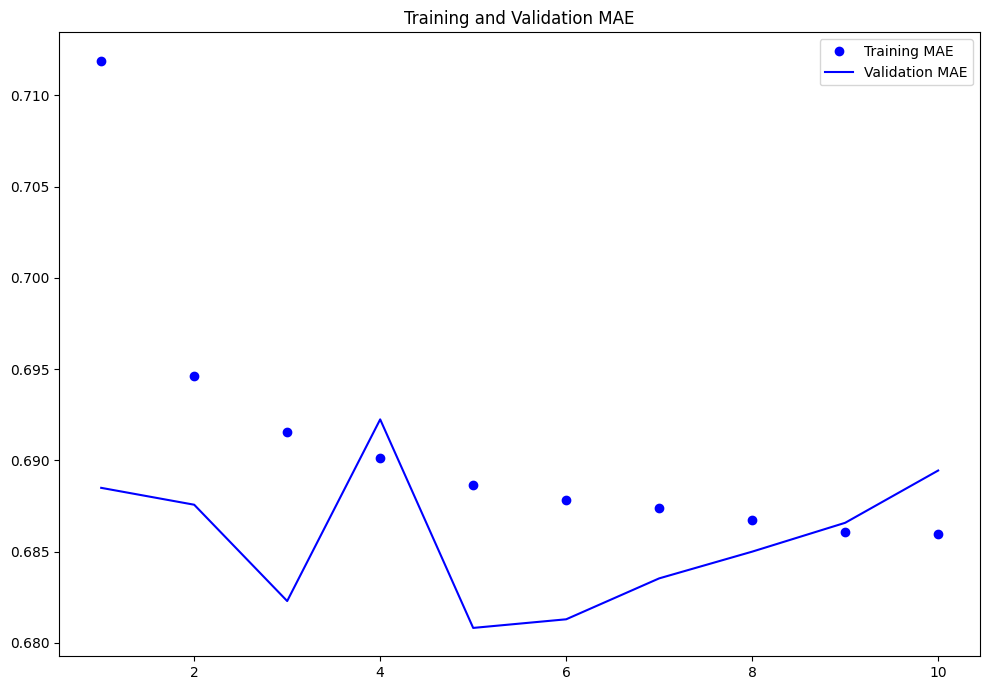

In [33]:
import matplotlib.pyplot as plt
loss = history_model_1.history['mae']
val_loss = history_model_1.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Model 2: 1D convolutional model

In [34]:
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation='relu')(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation='relu')(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_conv1d')

callbacks = [tf.keras.callbacks.ModelCheckpoint("Weather time series/model_2_conv1d", save_best_only=True)]

model_2.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=['mae']
)

history_model_2 = model_2.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
819/819 [==============================] - ETA: 0s - loss: 0.8632 - mae: 0.7059

INFO:tensorflow:Assets written to: Weather time series\model_2_conv1d\assets


INFO:tensorflow:Assets written to: Weather time series\model_2_conv1d\assets


819/819 [==============================] - 14s 16ms/step - loss: 0.8632 - mae: 0.7059 - val_loss: 0.8205 - val_mae: 0.7003
Epoch 2/10
819/819 [==============================] - 13s 16ms/step - loss: 0.8524 - mae: 0.6989 - val_loss: 0.8448 - val_mae: 0.7037
Epoch 3/10
819/819 [==============================] - 13s 16ms/step - loss: 0.8484 - mae: 0.6963 - val_loss: 0.8264 - val_mae: 0.6954
Epoch 4/10
819/819 [==============================] - 13s 16ms/step - loss: 0.8456 - mae: 0.6945 - val_loss: 0.8261 - val_mae: 0.6916
Epoch 5/10
819/819 [==============================] - 13s 16ms/step - loss: 0.8436 - mae: 0.6931 - val_loss: 0.8289 - val_mae: 0.6928
Epoch 6/10
819/819 [==============================] - 13s 16ms/step - loss: 0.8421 - mae: 0.6921 - val_loss: 0.8264 - val_mae: 0.6977
Epoch 7/10
819/819 [==============================] - 13s 16ms/step - loss: 0.8408 - mae: 0.6913 - val_loss: 0.8273 - val_mae: 0.6961
Epoch 8/10
819/819 [==============================] - 13s 16ms/step - los

In [35]:
model_2.evaluate(test_dataset)

405/405 [==============================] - 2s 5ms/step - loss: 0.8827 - mae: 0.7146


[0.882732093334198, 0.7145615220069885]

In [36]:
model_2 = tf.keras.models.load_model('Weather time series/model_2_conv1d')
model_2.evaluate(test_dataset)

405/405 [==============================] - 3s 5ms/step - loss: 0.8728 - mae: 0.7164


[0.8728290796279907, 0.7164276242256165]

In [37]:
model_2_mae = model_2.evaluate(test_dataset)[1]
model_2_mae

405/405 [==============================] - 3s 5ms/step - loss: 0.8728 - mae: 0.7164


0.7164271473884583

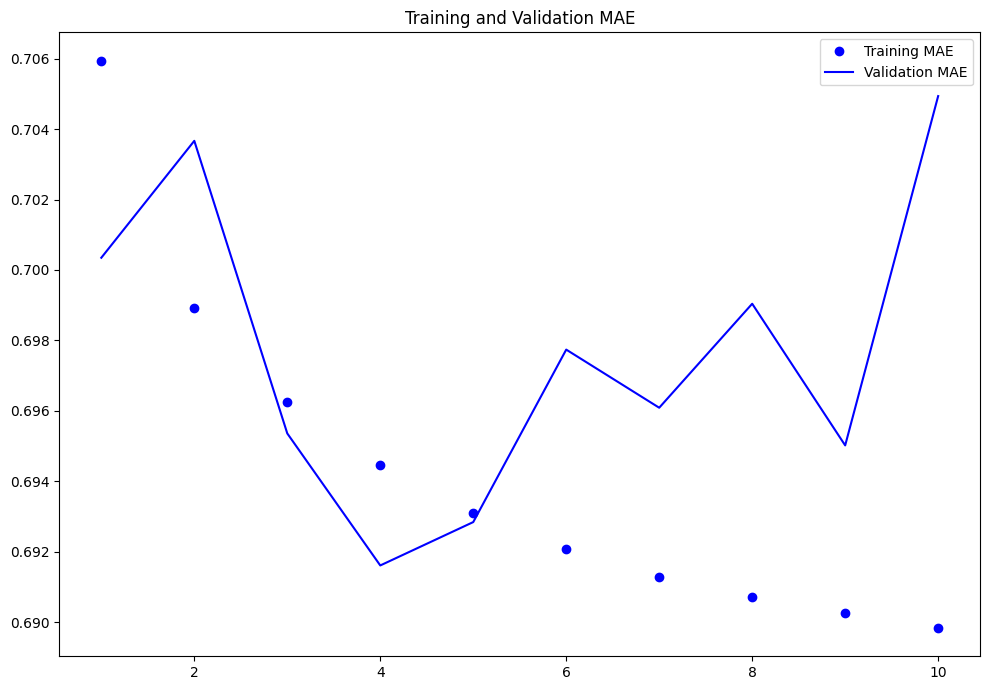

In [38]:
import matplotlib.pyplot as plt
loss = history_model_2.history['mae']
val_loss = history_model_2.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

# model 3: first recurrent baseline

In [39]:
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model_3 = tf.keras.models.Model(inputs, outputs, name='model_3_simple_lstm')

callbacks = [tf.keras.callbacks.ModelCheckpoint('Weather time series/model_3_simple_lstm', save_best_only=True)]

model_3.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=['mae']
)

history_model_3 = model_3.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10
817/819 [============================>.] - ETA: 0s - loss: 0.8508 - mae: 0.6981

INFO:tensorflow:Assets written to: Weather time series\model_3_simple_lstm\assets


INFO:tensorflow:Assets written to: Weather time series\model_3_simple_lstm\assets


819/819 [==============================] - 28s 32ms/step - loss: 0.8507 - mae: 0.6980 - val_loss: 0.8000 - val_mae: 0.6787
Epoch 2/10
819/819 [==============================] - 25s 30ms/step - loss: 0.8429 - mae: 0.6935 - val_loss: 0.8012 - val_mae: 0.6860
Epoch 3/10
819/819 [==============================] - 25s 31ms/step - loss: 0.8413 - mae: 0.6924 - val_loss: 0.8010 - val_mae: 0.6806
Epoch 4/10
819/819 [==============================] - 25s 31ms/step - loss: 0.8400 - mae: 0.6915 - val_loss: 0.8037 - val_mae: 0.6904
Epoch 5/10
819/819 [==============================] - 25s 31ms/step - loss: 0.8389 - mae: 0.6909 - val_loss: 0.8025 - val_mae: 0.6833
Epoch 6/10
819/819 [==============================] - 25s 31ms/step - loss: 0.8381 - mae: 0.6903 - val_loss: 0.8038 - val_mae: 0.6864
Epoch 7/10
819/819 [==============================] - 25s 30ms/step - loss: 0.8372 - mae: 0.6898 - val_loss: 0.8044 - val_mae: 0.6831
Epoch 8/10
819/819 [==============================] - 25s 31ms/step - los

In [40]:
model_3.evaluate(test_dataset)

405/405 [==============================] - 6s 15ms/step - loss: 0.8546 - mae: 0.6959


[0.8545589447021484, 0.6959323883056641]

In [41]:
model_3 = tf.keras.models.load_model('Weather time series/model_3_simple_lstm')
model_3.evaluate(test_dataset)

405/405 [==============================] - 7s 14ms/step - loss: 0.8465 - mae: 0.6902


[0.8464624881744385, 0.6902448534965515]

In [42]:
model_3_mae = model_3.evaluate(test_dataset)[1]
model_3_mae

405/405 [==============================] - 6s 14ms/step - loss: 0.8465 - mae: 0.6902


0.6902449131011963

In [44]:
model_1_mae, model_2_mae, model_3_mae

(0.6966271996498108, 0.7164271473884583, 0.6902449131011963)

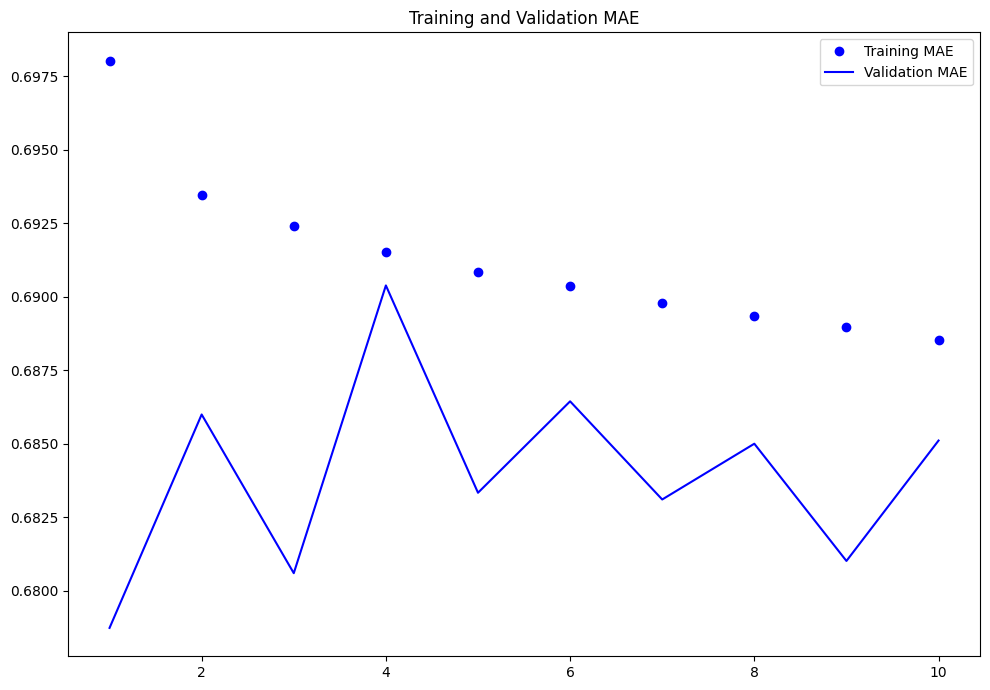

In [45]:
import matplotlib.pyplot as plt
loss = history_model_3.history['mae']
val_loss = history_model_3.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
list = np.arange(0, 20)
import tensorflow as tf
shit = tf.keras.utils.timeseries_dataset_from_array(
    data=list[:-3],
    targets=list[3:],
    sequence_length=3,
    batch_size=1
)

In [68]:
x_train = []
y_train = []
for samples, targets in shit:
   for i in samples:
       x = samples.numpy()
       y = targets.numpy()
   x_train.append(x)
   y_train.append(y)

import pandas as pd
data = pd.DataFrame({
    "X_Train":x_train,
    "Y_Train":y_train
})
data

,X_Train,Y_Train
0,"[[0, 1, 2]]",[3]
1,"[[1, 2, 3]]",[4]
2,"[[2, 3, 4]]",[5]
3,"[[3, 4, 5]]",[6]
4,"[[4, 5, 6]]",[7]
5,"[[5, 6, 7]]",[8]
6,"[[6, 7, 8]]",[9]
7,"[[7, 8, 9]]",[10]
8,"[[8, 9, 10]]",[11]
9,"[[9, 10, 11]]",[12]


In [72]:
features = 14
steps = 120
inputs = layers.Input(shape=(steps, features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
outputs.shape

TensorShape([None, 16])

In [73]:
features = 14
steps = 120
inputs = layers.Input(shape=(steps, features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
outputs.shape

TensorShape([None, 120, 16])

In [76]:
inputs = layers.Input(shape=(steps, features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
outputs.shape

TensorShape([None, 16])

# Model 4: Recurrent dropout, and dropout

In [78]:
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4_recurrent_dropout')

callbacks = [tf.keras.callbacks.ModelCheckpoint('Weather time series/model_4_recurrent_dropout', save_best_only=True)]

model_4.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=['mae']
)

history_model_4 = model_4.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
818/819 [============================>.] - ETA: 0s - loss: 0.8654 - mae: 0.7053

INFO:tensorflow:Assets written to: Weather time series\model_4_recurrent_dropout\assets


INFO:tensorflow:Assets written to: Weather time series\model_4_recurrent_dropout\assets


819/819 [==============================] - 68s 81ms/step - loss: 0.8654 - mae: 0.7053 - val_loss: 0.7998 - val_mae: 0.6854
Epoch 2/50
818/819 [============================>.] - ETA: 0s - loss: 0.8520 - mae: 0.6994

INFO:tensorflow:Assets written to: Weather time series\model_4_recurrent_dropout\assets


INFO:tensorflow:Assets written to: Weather time series\model_4_recurrent_dropout\assets


819/819 [==============================] - 70s 85ms/step - loss: 0.8520 - mae: 0.6994 - val_loss: 0.7989 - val_mae: 0.6839
Epoch 3/50
819/819 [==============================] - 89s 109ms/step - loss: 0.8513 - mae: 0.6988 - val_loss: 0.7997 - val_mae: 0.6861
Epoch 4/50
818/819 [============================>.] - ETA: 0s - loss: 0.8503 - mae: 0.6982

INFO:tensorflow:Assets written to: Weather time series\model_4_recurrent_dropout\assets


INFO:tensorflow:Assets written to: Weather time series\model_4_recurrent_dropout\assets


819/819 [==============================] - 93s 114ms/step - loss: 0.8503 - mae: 0.6982 - val_loss: 0.7985 - val_mae: 0.6849
Epoch 5/50
819/819 [==============================] - 124s 152ms/step - loss: 0.8497 - mae: 0.6977 - val_loss: 0.7997 - val_mae: 0.6843
Epoch 6/50
819/819 [==============================] - 133s 162ms/step - loss: 0.8491 - mae: 0.6971 - val_loss: 0.8003 - val_mae: 0.6867
Epoch 7/50
819/819 [==============================] - 133s 162ms/step - loss: 0.8485 - mae: 0.6968 - val_loss: 0.8002 - val_mae: 0.6862
Epoch 8/50
819/819 [==============================] - 133s 163ms/step - loss: 0.8481 - mae: 0.6965 - val_loss: 0.8008 - val_mae: 0.6855
Epoch 9/50
819/819 [==============================] - 135s 165ms/step - loss: 0.8475 - mae: 0.6962 - val_loss: 0.8009 - val_mae: 0.6874
Epoch 10/50
819/819 [==============================] - 135s 164ms/step - loss: 0.8469 - mae: 0.6957 - val_loss: 0.8005 - val_mae: 0.6868
Epoch 11/50
819/819 [==============================] - 135s

In [79]:
model_4.evaluate(test_dataset)

405/405 [==============================] - 14s 33ms/step - loss: 0.8607 - mae: 0.7008


[0.8606730699539185, 0.7008174061775208]

In [80]:
model_4 = tf.keras.models.load_model('Weather time series/model_4_recurrent_dropout')
model_4.evaluate(test_dataset)

405/405 [==============================] - 15s 36ms/step - loss: 0.8454 - mae: 0.6958


[0.8453914523124695, 0.6957659721374512]

In [82]:
model_4_mae = model_4.evaluate(test_dataset)[1]
model_4_mae

405/405 [==============================] - 15s 36ms/step - loss: 0.8454 - mae: 0.6958


0.6957661509513855

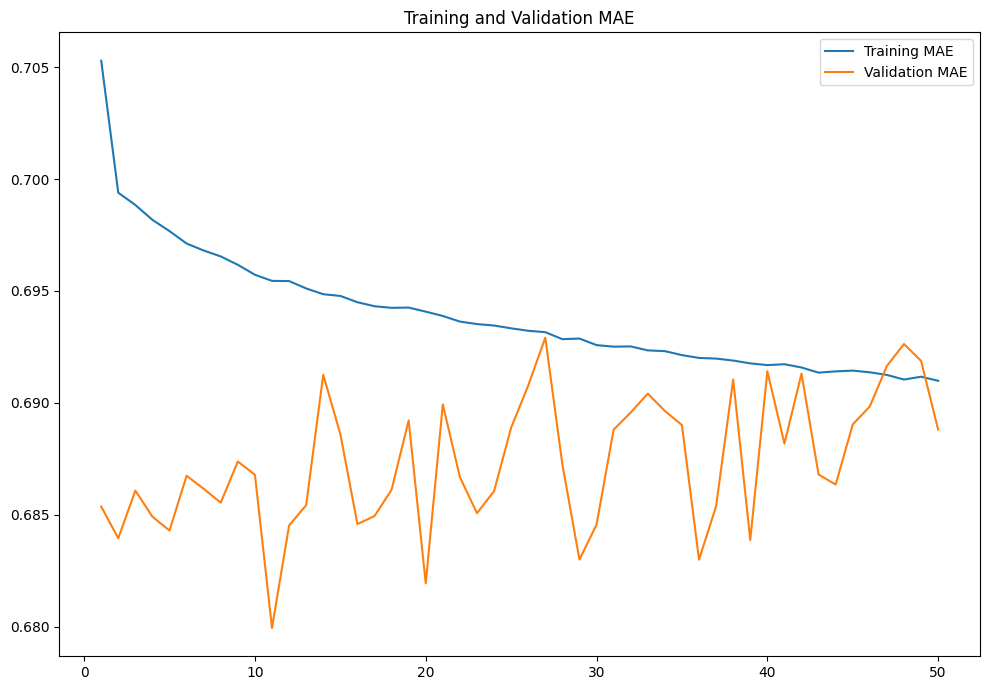

In [83]:
import matplotlib.pyplot as plt
loss = history_model_4.history['mae']
val_loss = history_model_4.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, loss, '-', label='Training MAE')
plt.plot(epochs, val_loss, '-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Model 5: Stacked GRU model with dropout

In [89]:
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, return_sequences=True, recurrent_dropout=0.5)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)  # Regularization the dense layer
outputs = layers.Dense(1)(x)
model_5 = tf.keras.models.Model(inputs, outputs, name='Model_5_stacked_gru_dropped')

callbacks = [tf.keras.callbacks.ModelCheckpoint('Weather time series/Model_5_stacked_gru_dropped', save_best_only=True)]

model_5.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

history_model_5 = model_5.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
819/819 [==============================] - ETA: 0s - loss: 0.8629 - mae: 0.7043

INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


819/819 [==============================] - 382s 463ms/step - loss: 0.8629 - mae: 0.7043 - val_loss: 0.8001 - val_mae: 0.6862
Epoch 2/50
819/819 [==============================] - ETA: 0s - loss: 0.8522 - mae: 0.6994

INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


819/819 [==============================] - 393s 479ms/step - loss: 0.8522 - mae: 0.6994 - val_loss: 0.7990 - val_mae: 0.6848
Epoch 3/50
819/819 [==============================] - ETA: 0s - loss: 0.8509 - mae: 0.6988

INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


819/819 [==============================] - 421s 514ms/step - loss: 0.8509 - mae: 0.6988 - val_loss: 0.7986 - val_mae: 0.6829
Epoch 4/50
819/819 [==============================] - 425s 518ms/step - loss: 0.8502 - mae: 0.6983 - val_loss: 0.7993 - val_mae: 0.6855
Epoch 5/50
819/819 [==============================] - ETA: 0s - loss: 0.8492 - mae: 0.6977

INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


819/819 [==============================] - 430s 525ms/step - loss: 0.8492 - mae: 0.6977 - val_loss: 0.7984 - val_mae: 0.6812
Epoch 6/50
819/819 [==============================] - ETA: 0s - loss: 0.8482 - mae: 0.6970

INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


INFO:tensorflow:Assets written to: Weather time series\Model_5_stacked_gru_dropped\assets


819/819 [==============================] - 429s 523ms/step - loss: 0.8482 - mae: 0.6970 - val_loss: 0.7976 - val_mae: 0.6819
Epoch 7/50
819/819 [==============================] - 445s 543ms/step - loss: 0.8473 - mae: 0.6964 - val_loss: 0.7986 - val_mae: 0.6849
Epoch 8/50
819/819 [==============================] - 450s 549ms/step - loss: 0.8464 - mae: 0.6958 - val_loss: 0.7980 - val_mae: 0.6800
Epoch 9/50
819/819 [==============================] - 449s 548ms/step - loss: 0.8456 - mae: 0.6955 - val_loss: 0.7984 - val_mae: 0.6806
Epoch 10/50
819/819 [==============================] - 450s 549ms/step - loss: 0.8447 - mae: 0.6950 - val_loss: 0.7998 - val_mae: 0.6819
Epoch 11/50
819/819 [==============================] - 449s 549ms/step - loss: 0.8436 - mae: 0.6943 - val_loss: 0.7994 - val_mae: 0.6800
Epoch 12/50
819/819 [==============================] - 450s 549ms/step - loss: 0.8426 - mae: 0.6937 - val_loss: 0.8007 - val_mae: 0.6861
Epoch 13/50
819/819 [==============================] - 4

In [91]:
model_5.evaluate(test_dataset)

405/405 [==============================] - 41s 100ms/step - loss: 0.8703 - mae: 0.7073


[0.8702806830406189, 0.7073208689689636]

In [92]:
model_5 = tf.keras.models.load_model('Weather time series/model_5_stacked_gru_dropped')
model_5_mae = model_5.evaluate(test_dataset)[1]
model_5_mae


405/405 [==============================] - 42s 102ms/step - loss: 0.8439 - mae: 0.6928


0.6928114891052246

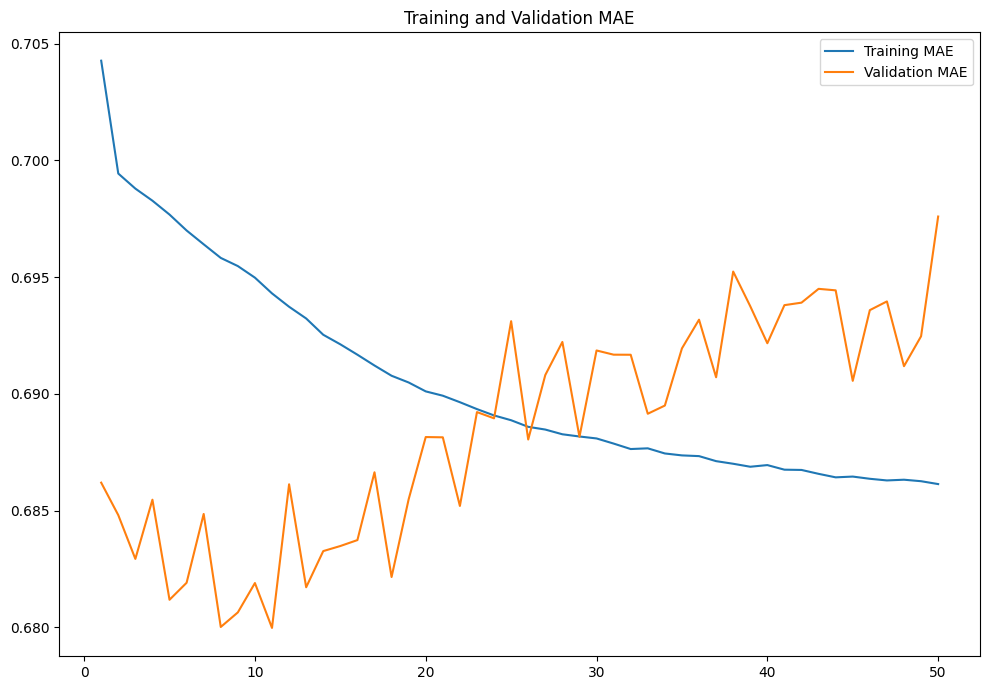

In [93]:
import matplotlib.pyplot as plt
loss = history_model_5.history['mae']
val_loss = history_model_5.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, loss, '-', label='Training MAE')
plt.plot(epochs, val_loss, '-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Model 6: Bidirectional LSTM

In [86]:
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model_6 = tf.keras.models.Model(inputs, outputs, name='model_6_bidirectional_lstm')

callbacks = [tf.keras.callbacks.ModelCheckpoint('Weather time series/model_6_bidirectional_lstm', save_best_only=True)]

model_6.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=['mae']
)

history_model_6 = model_6.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
819/819 [==============================] - ETA: 0s - loss: 0.8463 - mae: 0.6949

INFO:tensorflow:Assets written to: Weather time series\model_6_bidirectional_lstm\assets


INFO:tensorflow:Assets written to: Weather time series\model_6_bidirectional_lstm\assets


819/819 [==============================] - 49s 57ms/step - loss: 0.8463 - mae: 0.6949 - val_loss: 0.8021 - val_mae: 0.6772
Epoch 2/50
819/819 [==============================] - 46s 56ms/step - loss: 0.8401 - mae: 0.6916 - val_loss: 0.8027 - val_mae: 0.6798
Epoch 3/50
819/819 [==============================] - 46s 56ms/step - loss: 0.8375 - mae: 0.6900 - val_loss: 0.8039 - val_mae: 0.6812
Epoch 4/50
819/819 [==============================] - 44s 54ms/step - loss: 0.8353 - mae: 0.6887 - val_loss: 0.8069 - val_mae: 0.6784
Epoch 5/50
819/819 [==============================] - 45s 55ms/step - loss: 0.8334 - mae: 0.6875 - val_loss: 0.8062 - val_mae: 0.6864
Epoch 6/50
819/819 [==============================] - 45s 55ms/step - loss: 0.8317 - mae: 0.6865 - val_loss: 0.8073 - val_mae: 0.6888
Epoch 7/50
819/819 [==============================] - 45s 55ms/step - loss: 0.8303 - mae: 0.6856 - val_loss: 0.8092 - val_mae: 0.6903
Epoch 8/50
819/819 [==============================] - 46s 56ms/step - los

In [87]:
model_6.evaluate(test_dataset)

405/405 [==============================] - 14s 34ms/step - loss: 0.8674 - mae: 0.7026


[0.8673643469810486, 0.7026219964027405]

In [88]:
model_6 = tf.keras.models.load_model('Weather time series/model_6_bidirectional_lstm')
model_6_mae = model_6.evaluate(test_dataset)[1]
model_6_mae

405/405 [==============================] - 14s 33ms/step - loss: 0.8489 - mae: 0.6879


0.687919020652771

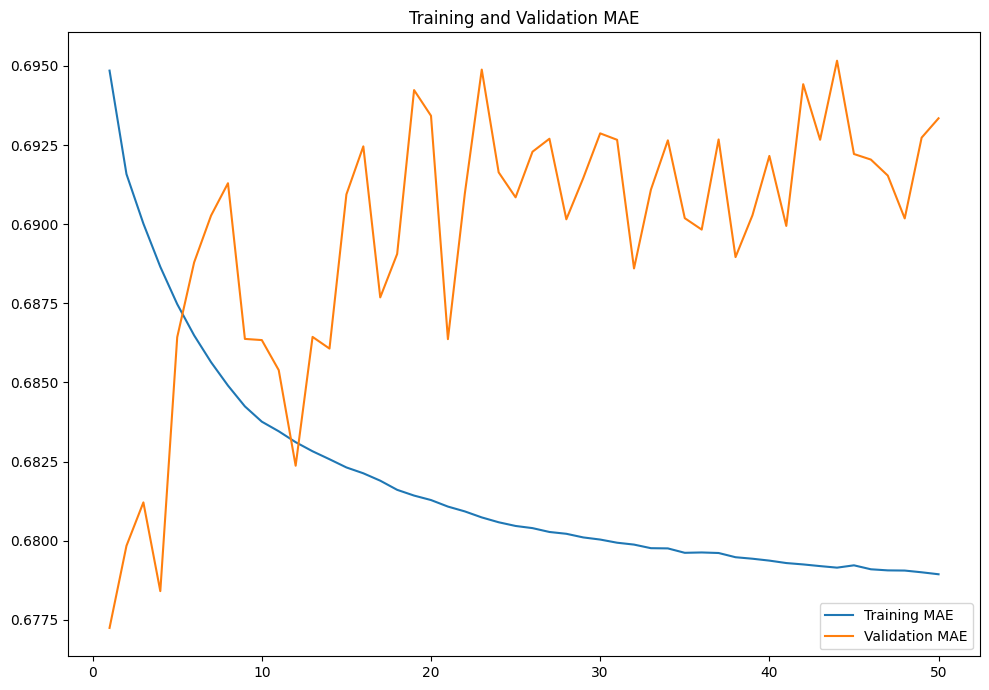

In [90]:
import matplotlib.pyplot as plt
loss = history_model_6.history['mae']
val_loss = history_model_6.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 7))
plt.plot(epochs, loss, '-', label='Training MAE')
plt.plot(epochs, val_loss, '-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

In [96]:
compare_list = pd.DataFrame({
    "Model_1":model_1_mae,
    "Model_2":model_2_mae,
    "Model_3":model_3_mae,
    "Model_4":model_4_mae,
    "Model_5":model_5_mae,
    "Model_6":model_6_mae
}, index=["MAE_Loss"])
compare_list

,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6
MAE_Loss,0.696627,0.716427,0.690245,0.695766,0.692811,0.687919


In [ ]:
compare_list.T